In [1]:
import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import community
import pandas as pd


import chart_studio.plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")


import metaknowledge as mk
RC = mk.RecordCollection(r'D:\python科学计量可视化\数据\Demo data\Python-Wos', cached = True)

In [2]:
RC2021 = RC.yearSplit(2020,2021)
df = pd.DataFrame(RC2021.makeDict())
print(len(df))
df.head()

783


,PT,AU,AF,TI,SO,LA,DT,DE,ID,AB,...,PM,HC,HP,CT,CY,CL,num-Authors,num-Male,num-Female,num-Unknown
0,J,"[Qu, Z, Zhang, SS]","[Qu, Zhao, Zhang, Shanshan]",References to literature from the business sec...,SCIENTOMETRICS,English,Article,"[electric mobility, ev charging, non-patent li...","[KNOWLEDGE PRODUCTION, INDUSTRY, SCIENCE, CITA...",Expansion of government R&D budgets on promoti...,...,None,None,None,None,None,None,2,0,0,2
1,J,"[Ngwenya, S, Boshoff, N]","[Ngwenya, Similo, Boshoff, Nelius]",Participation of 'international national organ...,SCIENTOMETRICS,English,Article,"[agriculture, authorship, collaboration, globa...","[RESEARCH COLLABORATION, PATTERNS]",The study investigated the participation of so...,...,None,None,None,None,None,None,2,0,0,2
2,J,"[Shahmandi, M, Wilson, P, Thelwall, M]","[Shahmandi, Marzieh, Wilson, Paul, Thelwall, M...",A new algorithm for zero-modified models appli...,SCIENTOMETRICS,English,Article,"[zero-modified models, discretised log-normal ...",None,Finding statistical models for citation count ...,...,None,None,None,None,None,None,3,2,0,1
3,J,"[Reynolds, R]","[Reynolds, Rebecca]",The digital divide,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,English,Book Review,None,"[CONNECTION, INTERNET]",None,...,None,None,None,None,None,None,1,0,1,0
4,J,"[Belli, S, Gonzalo-Penela, C]","[Belli, Simone, Gonzalo-Penela, Carlos]","Science, research, and innovation infospheres ...",SCIENTOMETRICS,English,Article,"[web mapping, universities, research centers, ...","[LATIN-AMERICA, WEB PAGE, IMPACT, PERSISTENCE,...",The growing digitalization of scientific resea...,...,None,None,None,None,None,None,2,1,1,0


In [3]:
cita_net = RC2021.networkCitation(dropAnon=True,dropNonJournals=True,coreOnly=True,directed=False)
print(mk.graphStats(cita_net))

Nodes: 714
Edges: 170
Isolates: 517
Self loops: 22
Density: 0.000667869
Transitivity: 0.12766


### 先删除自循环点/边

In [4]:
mk.dropEdges(cita_net,minWeight=1,dropSelfLoops=True)
print(mk.graphStats(cita_net))

Nodes: 714
Edges: 148
Isolates: 523
Self loops: 0
Density: 0.000581439
Transitivity: 0.12766


In [5]:
170-22

148

### 再剔除孤立点数据

输出网络数据集中的所有子群，获取子群节点数量，数量为1的子群即是孤立点，可以直接对列表进行count计数，核实孤立点数量

In [6]:
[len(c) for c in nx.connected_components(cita_net)].count(1)

523

剔除孤立点，即过滤掉节点为1的子群

In [7]:
print(sorted([len(c) for c in nx.connected_components(cita_net) if len(c) != 1],reverse=True))
#获取到所有子群节点的数量排序

[21, 15, 13, 11, 10, 7, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [8]:
[j for c in nx.connected_components(cita_net) if len(c) != 1 for j in c]

['Zhang L, 2020, SCIENTOMETRICS',
 'Belli S, 2020, SCIENTOMETRICS',
 'Liu Ws, 2020, SCIENTOMETRICS',
 'Liu Ws, 2021, SCIENTOMETRICS',
 'Meng L, 2020, SCIENTOMETRICS',
 'Blumel C, 2020, SCIENTOMETRICS',
 'Szomszor M, 2020, SCIENTOMETRICS',
 'Harsh M, 2021, SCIENTOMETRICS',
 'Moradi S, 2021, SCIENTOMETRICS',
 'Haghighat M, 2021, SCIENTOMETRICS',
 'Rodrigues Ba, 2021, SCIENTOMETRICS',
 'Homolak J, 2020, SCIENTOMETRICS',
 'Lei L, 2020, SCIENTOMETRICS',
 'Li H, 2020, SCIENTOMETRICS',
 'Zhu Yj, 2020, SCIENTOMETRICS',
 'Peroni S, 2020, SCIENTOMETRICS',
 'Hu Gy, 2020, SCIENTOMETRICS',
 'Zhu Jw, 2020, SCIENTOMETRICS',
 'Yu Dj, 2020, SCIENTOMETRICS',
 'Soltani P, 2020, SCIENTOMETRICS',
 'Simoes N, 2020, J INFORMETR',
 'Batagelj V, 2020, SCIENTOMETRICS',
 'Cugmas M, 2020, SCIENTOMETRICS',
 'Prathap G, 2020, SCIENTOMETRICS',
 'Lu C, 2020, J ASSOC INF SCI TECH',
 'Baumann A, 2020, SCIENTOMETRICS',
 'Garcia-Suaza A, 2020, SCIENTOMETRICS',
 'Xie Z, 2020, J INFORMETR',
 'Lindahl J, 2020, SCIENTOMETRIC

In [9]:
cita_net_filter = cita_net.subgraph([j for c in nx.connected_components(cita_net) if len(c) != 1 for j in c])
print(cita_net_filter)

Graph with 191 nodes and 148 edges


In [10]:
714-523

191

节点数和连线数对应上，为了方便后续调用，可以将过程封装函数

In [11]:
def filter_isolate_nodes(G, min_count=1):
    print('未剔除孤立点之前的网络数据集基础信息：\n')
    print(mk.graphStats(G)+'\n')
    G_filter = G.subgraph([j for c in nx.connected_components(G) if len(c) > min_count for j in c])
    return G_filter

In [12]:
print(filter_isolate_nodes(cita_net))

未剔除孤立点之前的网络数据集基础信息：

Nodes: 714
Edges: 148
Isolates: 523
Self loops: 0
Density: 0.000581439
Transitivity: 0.12766

Graph with 191 nodes and 148 edges


### 可视化网络图及求解节点中心度相关指标

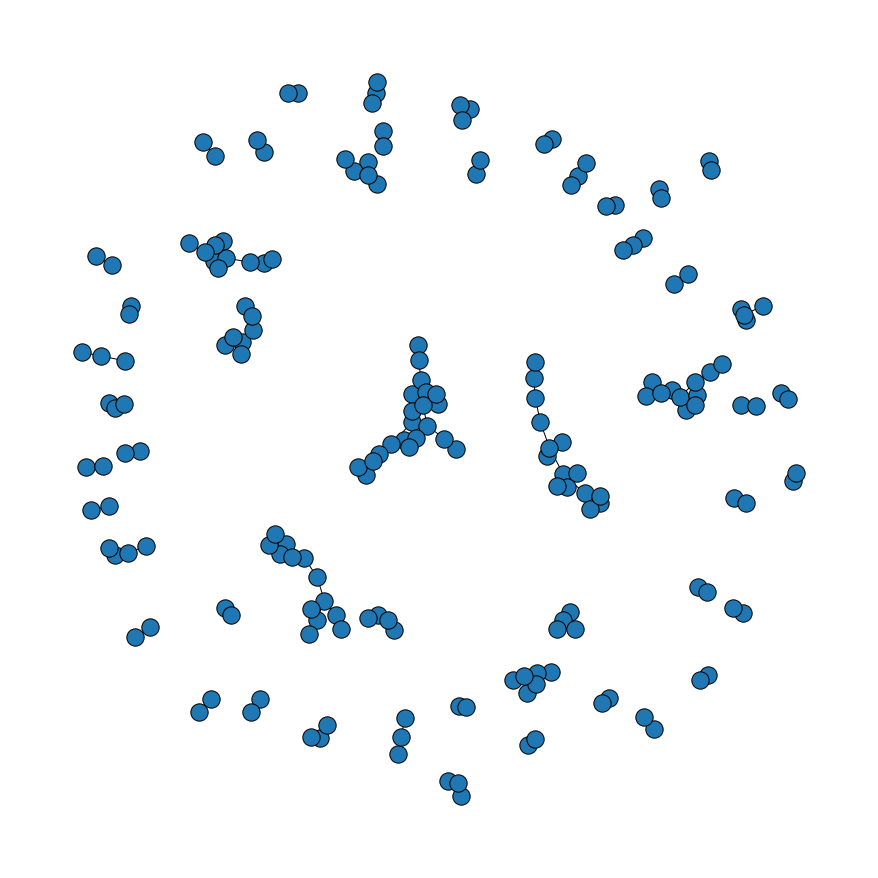

In [13]:
plt.figure(figsize=(12,12))
nx.draw_spring(cita_net_filter,edgecolors='k')

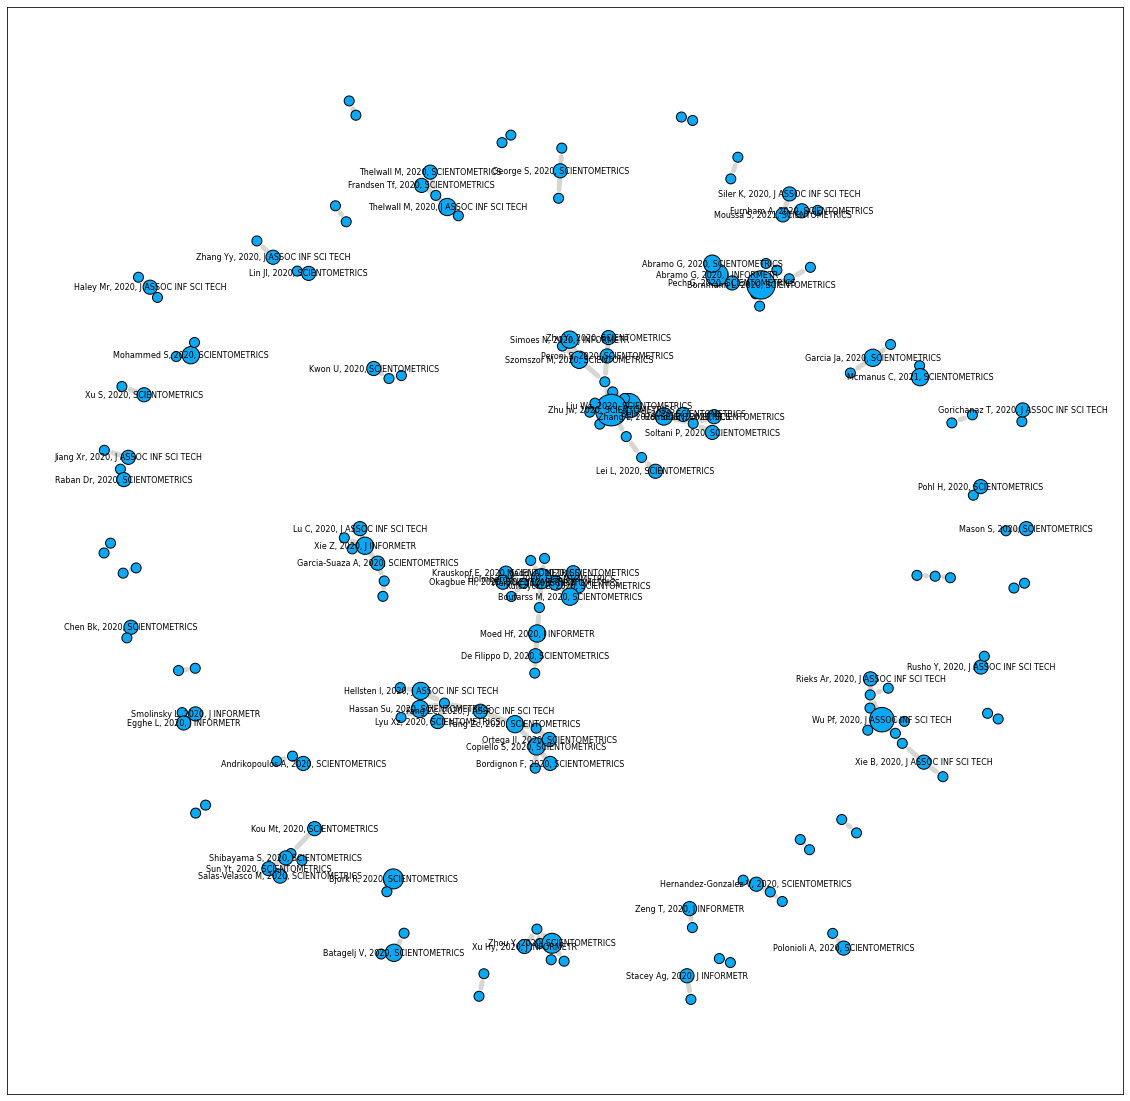

In [14]:
node_size = [v['count']*100 for k,v in cita_net_filter.nodes.data()]
edge_width = [v[-1]['weight']*5 for v in cita_net_filter.edges.data()]

plt.figure(figsize=(20,20))
pos = nx.spring_layout(cita_net_filter,seed=42)

#按照连线的权重设置连线的粗细
edges = nx.draw_networkx_edges(cita_net_filter,pos,edge_color='#D4D5CE',alpha=0.95,width=edge_width,arrows=True)

#按照节点count计数属性或者节点度相关指标进行节点大小设置
nodes = nx.draw_networkx_nodes(cita_net_filter,pos,edgecolors='k',node_size=node_size,node_color='#0AA9F5')

# #按照节点count计数属性或者节点度相关指标进行标签大小设置
G_sub = cita_net_filter.subgraph([k for k,v in cita_net_filter.nodes.data() if v['count'] >1])
nx.draw_networkx_labels(G_sub,pos,font_size=8)

plt.savefig('figures/citation.png',dpi=300,bbox='tight')

图中子群节点数量为2和3的较多，可以进一步剔除

In [15]:
cita_net_2 = filter_isolate_nodes(cita_net,min_count=3)
print(cita_net_2)

未剔除孤立点之前的网络数据集基础信息：

Nodes: 714
Edges: 148
Isolates: 523
Self loops: 0
Density: 0.000581439
Transitivity: 0.12766

Graph with 100 nodes and 97 edges


Modularity: 0.8768742791234141


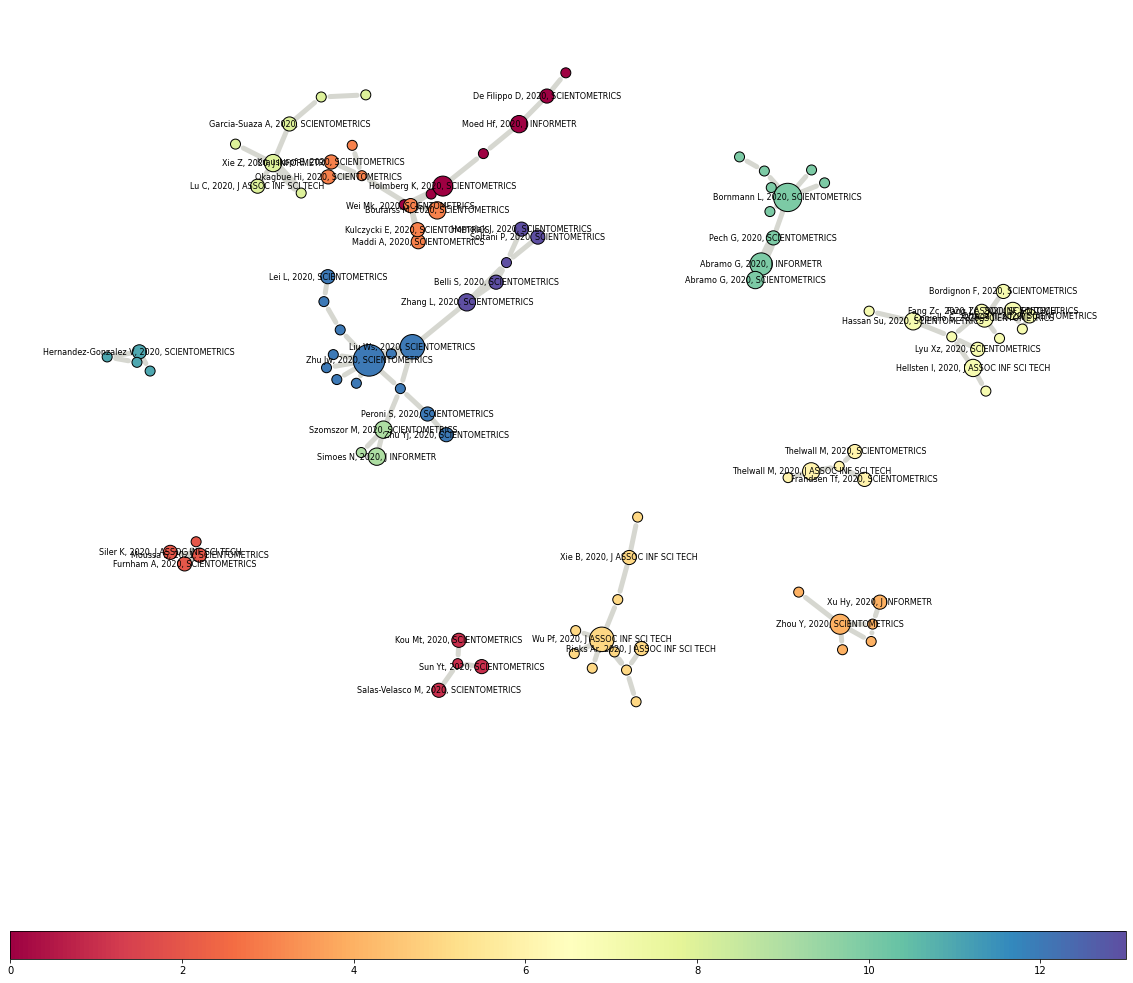

In [16]:
#根据网络社团进行着色
partion_ci = community.best_partition(cita_net_2)
modularity = community.modularity(partion_ci,cita_net_2)
print('Modularity:',modularity)

color_ci = [partion_ci[n] for n in cita_net_2.nodes()]
node_size = [v['count']*100 for k,v in cita_net_2.nodes.data()]
edge_width = [v[-1]['weight']*5 for v in cita_net_2.edges.data()]

fig = plt.figure(figsize=(20,20))
pos = nx.spring_layout(cita_net_2,seed=3,k=0.2,iterations=90)

#按照连线的权重设置连线的粗细
edges = nx.draw_networkx_edges(cita_net_2,pos,edge_color='#D4D5CE',alpha=0.95,width=edge_width,arrows=True)

#按照节点count计数属性或者节点度相关指标进行节点大小设置
nodes = nx.draw_networkx_nodes(cita_net_2,pos,edgecolors='k',node_size=node_size,node_color=color_ci,cmap=plt.cm.Spectral)

# #按照节点count计数属性或者节点度相关指标进行标签大小设置
G_sub = cita_net_2.subgraph([k for k,v in cita_net_2.nodes.data() if v['count'] >1])
nx.draw_networkx_labels(G_sub,pos,font_size=8)

#显示色谱条,只需要修改cmap色谱主题、location颜色条放置位置，aspect颜色条大小
import matplotlib as mpl
pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Spectral)
pc.set_array(color_ci)
ax = plt.gca()
ax.set_axis_off()
cb = plt.colorbar(pc, ax=ax,location='bottom',aspect =40)

plt.savefig('figures/citation_nodes_up_2.png',dpi=300,bbox='tight')

In [17]:
def degreeStats(Graph):
    import pandas as pd
    
    deg = nx.degree_centrality(Graph)
    eig = nx.eigenvector_centrality(Graph,max_iter=500)
    bet = nx.betweenness_centrality(Graph)
    clo = nx.closeness_centrality(Graph)
    
    df = pd.DataFrame([deg, eig, bet, clo],index=['degree', 'eigenvector', 'betweenness', 'closeness']).T

    return df

degreeStats(cita_net_2)

,degree,eigenvector,betweenness,closeness
"Moed Hf, 2020, J INFORMETR",0.020202,1.264133e-06,0.004947,0.043039
"Kou Mt, 2020, SCIENTOMETRICS",0.010101,4.033948e-14,0.000000,0.018182
"Fang Zc, 2020, SCIENTOMETRICS",0.030303,1.225894e-07,0.007524,0.051948
"Krauskopf E, 2020, SCIENTOMETRICS",0.020202,5.028081e-06,0.000000,0.041246
"Chen L, 2020, SCIENTOMETRICS",0.010101,5.059574e-08,0.000000,0.025253
...,...,...,...,...
"Paswan J, 2020, SCIENTOMETRICS",0.010101,3.860422e-13,0.000000,0.017957
"Peroni S, 2020, SCIENTOMETRICS",0.020202,1.218272e-01,0.003917,0.065168
"Salas-Velasco M, 2020, SCIENTOMETRICS",0.010101,4.033948e-14,0.000000,0.018182
"Simoes N, 2020, J INFORMETR",0.020202,6.190580e-02,0.000000,0.051800


如果需要知道按照节点计数Count属性的属性，也可以将该数据添加DataFrame中

In [18]:
df = degreeStats(cita_net_2)
df['count'] = [v['count'] for k,v in cita_net_2.nodes.data()]
df

,degree,eigenvector,betweenness,closeness,count
"Moed Hf, 2020, J INFORMETR",0.020202,1.264133e-06,0.004947,0.043039,3
"Kou Mt, 2020, SCIENTOMETRICS",0.010101,4.033948e-14,0.000000,0.018182,2
"Fang Zc, 2020, SCIENTOMETRICS",0.030303,1.225894e-07,0.007524,0.051948,3
"Krauskopf E, 2020, SCIENTOMETRICS",0.020202,5.028081e-06,0.000000,0.041246,2
"Chen L, 2020, SCIENTOMETRICS",0.010101,5.059574e-08,0.000000,0.025253,1
...,...,...,...,...,...
"Paswan J, 2020, SCIENTOMETRICS",0.010101,3.860422e-13,0.000000,0.017957,1
"Peroni S, 2020, SCIENTOMETRICS",0.020202,1.218272e-01,0.003917,0.065168,2
"Salas-Velasco M, 2020, SCIENTOMETRICS",0.010101,4.033948e-14,0.000000,0.018182,2
"Simoes N, 2020, J INFORMETR",0.020202,6.190580e-02,0.000000,0.051800,3


In [19]:
df.sort_values('count',ascending=False)[:20]

,degree,eigenvector,betweenness,closeness,count
"Zhu Jw, 2020, SCIENTOMETRICS",0.080808,5.833643e-01,0.023088,0.096200,10
"Bornmann L, 2020, SCIENTOMETRICS",0.060606,7.824447e-07,0.006597,0.062937,8
"Wu Pf, 2020, J ASSOC INF SCI TECH",0.060606,1.320655e-04,0.007421,0.067340,6
"Liu Ws, 2020, SCIENTOMETRICS",0.040404,4.227078e-01,0.016079,0.091827,6
"Abramo G, 2020, J INFORMETR",0.020202,1.773658e-07,0.001649,0.035573,5
"Zhou Y, 2020, SCIENTOMETRICS",0.040404,1.237464e-07,0.001443,0.042088,4
"Holmberg K, 2020, SCIENTOMETRICS",0.040404,6.362214e-06,0.011750,0.065993,4
"Simoes N, 2020, J INFORMETR",0.020202,6.190580e-02,0.000000,0.051800,3
"Szomszor M, 2020, SCIENTOMETRICS",0.030303,1.477628e-01,0.007421,0.067340,3
"Boufarss M, 2020, SCIENTOMETRICS",0.010101,3.533484e-06,0.000000,0.047138,3
